In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("./sonar_csv.csv")

In [0]:
# Data analysis and preparation
# Logistic Regression
# Naive Bayes
# XGBoost
# SVC
# Decision Tree
# Random Forest
# Model comparision
# voting classifier

In [6]:
df.head(2)

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,attribute_11,attribute_12,attribute_13,attribute_14,attribute_15,attribute_16,attribute_17,attribute_18,attribute_19,attribute_20,attribute_21,attribute_22,attribute_23,attribute_24,attribute_25,attribute_26,attribute_27,attribute_28,attribute_29,attribute_30,attribute_31,attribute_32,attribute_33,attribute_34,attribute_35,attribute_36,attribute_37,attribute_38,attribute_39,attribute_40,attribute_41,attribute_42,attribute_43,attribute_44,attribute_45,attribute_46,attribute_47,attribute_48,attribute_49,attribute_50,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.31,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.00,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.014,0.0049,0.0052,0.0044,Rock


In [7]:
list(set(df['Class']))

['Mine', 'Rock']

In [0]:
X = df.iloc[:,:-1].values

In [10]:
X

array([[0.02  , 0.0371, 0.0428, ..., 0.0084, 0.009 , 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]])

In [0]:
y = df.iloc[:,-1].values

In [12]:
y

array(['Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Mine', 'Mine', 'Mine', 'Mine', 'Mine', 'Mine', 'Mine',
       'Mine', 'Mine', 'Mine', 'Mine', 'Mine', 'Mine', 'Mine', 'Mine',
      

In [13]:
X.shape

(208, 60)

In [14]:
y.shape

(208,)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [16]:
print(X_train.shape)
print(Y_train.shape)


(166, 60)
(166,)


In [17]:
print(X_test.shape)
print(Y_test.shape)

(42, 60)
(42,)


# Logistic Regression

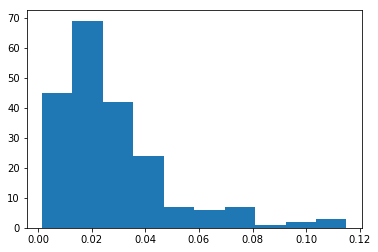

In [33]:
df.head(2)
#Let's say the outlier is present after 0.12
sdf = df[df['attribute_1']<0.12]
plt.hist(sdf['attribute_1'])
plt.show()

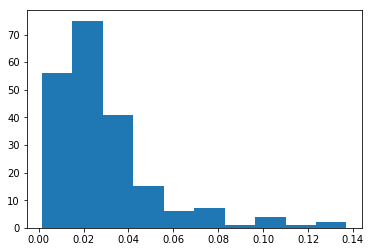

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(df['attribute_1'])
plt.show()

In [0]:
# Assumptions:
# 1. there is a linear relashionship between the logit of the outcome (dependent variable) and each predictor variables (independent variables)
#         logit(p) = log(p/(1-p))
# 2. there is no outliers in the predictors. seaborn boxplot
# 3. there is no co-relation between the dependent variables

In [20]:
# Training
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Testing
LR_pred = LR.predict(X_test)

In [22]:
LR_pred

array(['Mine', 'Mine', 'Mine', 'Rock', 'Mine', 'Mine', 'Mine', 'Mine',
       'Rock', 'Mine', 'Rock', 'Mine', 'Rock', 'Mine', 'Rock', 'Rock',
       'Mine', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Mine', 'Mine',
       'Rock', 'Mine', 'Mine', 'Mine', 'Rock', 'Mine', 'Rock', 'Mine',
       'Mine', 'Rock', 'Mine', 'Mine', 'Mine', 'Mine', 'Rock', 'Mine',
       'Mine', 'Mine'], dtype=object)

In [23]:
Y_test

array(['Rock', 'Rock', 'Rock', 'Rock', 'Mine', 'Rock', 'Mine', 'Mine',
       'Rock', 'Mine', 'Rock', 'Mine', 'Rock', 'Mine', 'Rock', 'Rock',
       'Mine', 'Rock', 'Rock', 'Rock', 'Mine', 'Rock', 'Rock', 'Rock',
       'Rock', 'Mine', 'Mine', 'Mine', 'Mine', 'Mine', 'Rock', 'Mine',
       'Mine', 'Rock', 'Mine', 'Mine', 'Mine', 'Mine', 'Rock', 'Mine',
       'Mine', 'Rock'], dtype=object)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,LR_pred)

0.7857142857142857

In [0]:
# Test --> 50% Rock 50% Mine --> model predicts all the samples as Rock --> 50%
# Test --> 80% Rock 20% Mine --> model predicts all the samples as Rock --> 80%

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,LR_pred)

array([[19,  2],
       [ 7, 14]])

In [0]:
# Rock is been identified as Rock = 19
# Rock is been identified as Mine = 2
# Mine is been identified as Mine = 14
# Mine is been identified as Rock = 7

#           ROCK.  MINE
  
#   ROCK      19.    2
#   MINE       7.    14
  
  
  
#             ROCK.  MINE
  
#   ROCK      19.    2
#   MINE      14.    7
  
 

In [29]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,LR_pred))

              precision    recall  f1-score   support

        Mine       0.73      0.90      0.81        21
        Rock       0.88      0.67      0.76        21

    accuracy                           0.79        42
   macro avg       0.80      0.79      0.78        42
weighted avg       0.80      0.79      0.78        42



# Naive Bayes

there is no co-relation between the dependent variables

In [34]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
NB_pred = NB.predict(X_test)

In [36]:
NB_pred

array(['Rock', 'Rock', 'Mine', 'Rock', 'Rock', 'Mine', 'Mine', 'Mine',
       'Rock', 'Rock', 'Rock', 'Mine', 'Rock', 'Rock', 'Rock', 'Mine',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Mine', 'Rock',
       'Rock', 'Mine', 'Mine', 'Mine', 'Rock', 'Mine', 'Rock', 'Mine',
       'Mine', 'Rock', 'Mine', 'Mine', 'Mine', 'Rock', 'Mine', 'Mine',
       'Rock', 'Mine'], dtype='<U4')

In [37]:
Y_test

array(['Rock', 'Rock', 'Rock', 'Rock', 'Mine', 'Rock', 'Mine', 'Mine',
       'Rock', 'Mine', 'Rock', 'Mine', 'Rock', 'Mine', 'Rock', 'Rock',
       'Mine', 'Rock', 'Rock', 'Rock', 'Mine', 'Rock', 'Rock', 'Rock',
       'Rock', 'Mine', 'Mine', 'Mine', 'Mine', 'Mine', 'Rock', 'Mine',
       'Mine', 'Rock', 'Mine', 'Mine', 'Mine', 'Mine', 'Rock', 'Mine',
       'Mine', 'Rock'], dtype=object)

In [38]:
accuracy_score(Y_test,NB_pred)

0.6666666666666666

In [39]:
confusion_matrix(Y_test,NB_pred)

array([[13,  8],
       [ 6, 15]])

In [40]:
print(classification_report(Y_test,NB_pred))

              precision    recall  f1-score   support

        Mine       0.68      0.62      0.65        21
        Rock       0.65      0.71      0.68        21

    accuracy                           0.67        42
   macro avg       0.67      0.67      0.67        42
weighted avg       0.67      0.67      0.67        42



# XGBoost

In [41]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
XGB_pred = XGB.predict(X_test)

In [43]:
XGB_pred

array(['Rock', 'Rock', 'Mine', 'Rock', 'Mine', 'Rock', 'Mine', 'Mine',
       'Rock', 'Rock', 'Rock', 'Mine', 'Rock', 'Mine', 'Rock', 'Rock',
       'Mine', 'Rock', 'Rock', 'Rock', 'Mine', 'Rock', 'Mine', 'Mine',
       'Rock', 'Mine', 'Mine', 'Mine', 'Mine', 'Mine', 'Rock', 'Mine',
       'Rock', 'Rock', 'Mine', 'Mine', 'Mine', 'Mine', 'Mine', 'Mine',
       'Mine', 'Rock'], dtype=object)

In [44]:
Y_test

array(['Rock', 'Rock', 'Rock', 'Rock', 'Mine', 'Rock', 'Mine', 'Mine',
       'Rock', 'Mine', 'Rock', 'Mine', 'Rock', 'Mine', 'Rock', 'Rock',
       'Mine', 'Rock', 'Rock', 'Rock', 'Mine', 'Rock', 'Rock', 'Rock',
       'Rock', 'Mine', 'Mine', 'Mine', 'Mine', 'Mine', 'Rock', 'Mine',
       'Mine', 'Rock', 'Mine', 'Mine', 'Mine', 'Mine', 'Rock', 'Mine',
       'Mine', 'Rock'], dtype=object)

In [45]:
accuracy_score(Y_test,XGB_pred)

0.8571428571428571

In [46]:
confusion_matrix(Y_test,XGB_pred)

array([[19,  2],
       [ 4, 17]])

In [47]:
print(classification_report(Y_test,XGB_pred))

              precision    recall  f1-score   support

        Mine       0.83      0.90      0.86        21
        Rock       0.89      0.81      0.85        21

    accuracy                           0.86        42
   macro avg       0.86      0.86      0.86        42
weighted avg       0.86      0.86      0.86        42



# SVC

We should have huge training dataset

In [48]:
from sklearn.svm import SVC
SVC_model = SVC()
SVC_model.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
SVC_pred = SVC_model.predict(X_test)

In [50]:
accuracy_score(Y_test,SVC_pred)

0.5952380952380952

In [51]:
confusion_matrix(Y_test,SVC_pred)

array([[20,  1],
       [16,  5]])

# decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
DT_pred = DT.predict(X_test)

In [54]:
DT_pred

array(['Mine', 'Mine', 'Mine', 'Rock', 'Mine', 'Mine', 'Mine', 'Mine',
       'Mine', 'Rock', 'Rock', 'Mine', 'Rock', 'Mine', 'Rock', 'Rock',
       'Mine', 'Rock', 'Rock', 'Rock', 'Rock', 'Mine', 'Mine', 'Rock',
       'Rock', 'Mine', 'Rock', 'Mine', 'Mine', 'Mine', 'Rock', 'Rock',
       'Mine', 'Rock', 'Mine', 'Mine', 'Rock', 'Mine', 'Mine', 'Mine',
       'Mine', 'Rock'], dtype=object)

In [56]:
Y_test

array(['Rock', 'Rock', 'Rock', 'Rock', 'Mine', 'Rock', 'Mine', 'Mine',
       'Rock', 'Mine', 'Rock', 'Mine', 'Rock', 'Mine', 'Rock', 'Rock',
       'Mine', 'Rock', 'Rock', 'Rock', 'Mine', 'Rock', 'Rock', 'Rock',
       'Rock', 'Mine', 'Mine', 'Mine', 'Mine', 'Mine', 'Rock', 'Mine',
       'Mine', 'Rock', 'Mine', 'Mine', 'Mine', 'Mine', 'Rock', 'Mine',
       'Mine', 'Rock'], dtype=object)

In [57]:
accuracy_score(Y_test,DT_pred)

0.6904761904761905

In [58]:
confusion_matrix(Y_test,DT_pred)

array([[16,  5],
       [ 8, 13]])

In [59]:
print(classification_report(Y_test,DT_pred))

              precision    recall  f1-score   support

        Mine       0.67      0.76      0.71        21
        Rock       0.72      0.62      0.67        21

    accuracy                           0.69        42
   macro avg       0.69      0.69      0.69        42
weighted avg       0.69      0.69      0.69        42



# Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
RF_pred = RF.predict(X_test)

In [63]:
accuracy_score(Y_test,RF_pred)

0.8333333333333334

In [64]:
confusion_matrix(Y_test,RF_pred)

array([[21,  0],
       [ 7, 14]])

In [65]:
print(classification_report(Y_test,RF_pred))

              precision    recall  f1-score   support

        Mine       0.75      1.00      0.86        21
        Rock       1.00      0.67      0.80        21

    accuracy                           0.83        42
   macro avg       0.88      0.83      0.83        42
weighted avg       0.88      0.83      0.83        42



# Comparision

In [0]:
LR_ACC = accuracy_score(Y_test,LR_pred)
NB_ACC = accuracy_score(Y_test,NB_pred)
XGB_ACC = accuracy_score(Y_test,XGB_pred)
SVC_ACC = accuracy_score(Y_test,SVC_pred)
DT_ACC = accuracy_score(Y_test,DT_pred)
RF_ACC = accuracy_score(Y_test,RF_pred)

In [67]:
[LR_ACC, NB_ACC, XGB_ACC, SVC_ACC, DT_ACC, RF_ACC]

[0.7857142857142857,
 0.6666666666666666,
 0.8571428571428571,
 0.5952380952380952,
 0.6904761904761905,
 0.8333333333333334]

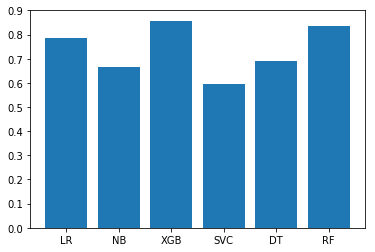

In [70]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fig, ax = plt.subplots()
ax.set_xticks(np.arange(6))
ax.set_xticklabels(["LR","NB","XGB","SVC","DT","RF"])
plt.bar(range(6),[LR_ACC, NB_ACC, XGB_ACC, SVC_ACC, DT_ACC, RF_ACC])
plt.show()

In [71]:
from sklearn.ensemble import VotingClassifier
voter = VotingClassifier(estimators=[('lr',LR),('XGB',XGB),('RF',RF)],voting='soft')
voter.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=0, solver='warn',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('XGB',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample...
                                                     clas

In [0]:
voter_pred = voter.predict(X_test)

In [73]:
accuracy_score(Y_test,voter_pred)

0.8809523809523809